# 신경망학습
## 1. 데이터에서 학습하기!
신경망의 특징: 데이터를 보고 학습할 수 있다. 즉 가중치 매개변수의 값을 데이터를 보고 자동으로 결정할 수 있다는 뜻이다.
### 데이터 주도 학습
- 기계학습
  - 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만든다.
- 학습 과정
  - 이미지에서 특징(벡터)을 추출하고 그 특징의 패턴을 기계학습 기술(지도학습 방식의 대표 분류 기법인 SVN, KNN등)로 학습한다.
  - 이미지를 벡터로 변환할 때 사용하는 특징은 '사람'이 설계해야 한다.
### 훈련 데이터와 시험 데이터
- 훈련 데이터: 데이터를 사용하여 학습하면서 최적의 매개변수를 찾는다.
- 시험 데이터: 앞서 훈련한 모델의 실력을 평가한다.
- 이렇게 나누는 이유: 범용 능력을 제대로 평가하기 위해서
  - 범용 능력: 아직 보지 못한 데이터로도 문제를 올바르게 풀어내용 능력
  - 오버피팅: 한 데이터셋에만 지나치게 최적화된 상태를 의미. 이것을 예방하기 위해 범용 능력을 평가해야 한다.

## 2. 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. 그래서 이러한 지표는 신경망 학습에서 손실함수(loss function)이라고 하고 오차제곱합과 교차 엔트로피 오차를 사용한다.
### 오차제곱합
- 가장 많이 쓰이는 손실함수이다.
- ${y_k}$는 신경망 출력, ${t_k}$는 정답 레이블, ${k}$는 데이터의 차원 수
- 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차를 제곱한 후 그 총합을 구한다.

In [1]:
import numpy as np
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#2일 확률이 가장 높다고 추정함
print(sum_squares_error(np.array(y), np.array(t)))

#7일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 교차 엔트로피 오차
- ${log}$는 밑이 ${e}$인 자연로그(${log_e}$), ${y_k}$는 신경망의 출력, ${t_k}$는 정답 레이블
$$ E = - \displaystyle\sum_{k}^{}(t_k log y_k)$$
- 실질적으로 정답일 때의 추정(${t_k}$가 1일 때의 ${y_k})의 자연 로그를 계산하는 식
- x가 1일 때 y는 0이되고 x가 0에 가까어질수록 y의 값은 점점 작아진다.
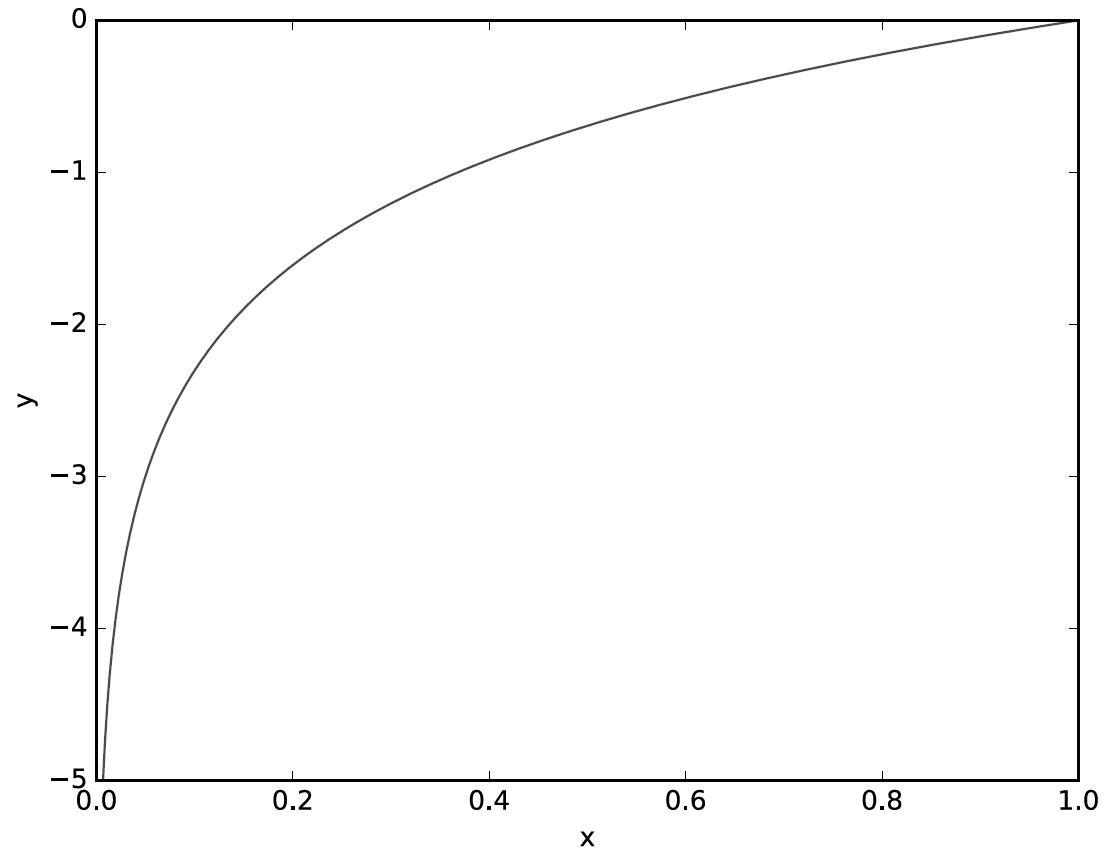

In [2]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 미니배치 학습
- 교차 엔트로피 오차 식
$$ E = -\frac{1}{N} \displaystyle\sum_{n} \displaystyle\sum_{k}t_{nk} log y_{nk} $$
- 데이터가 N개 라면 ${t_{nk}}$는 n번째 레이블의 k번째 값이다. 마지막에 N으로 나누어 정규화함으로서 '평균 손실 함수'를 구한다.
- 미니배치 훈련: 훈련 데이터로부터 일부만 골라 학습을 수행하는 것을 의미

In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(np.random.choice(60000, 10))

[ 7953 11682 48564 10586  9902 21583 30031  9443 37069 51548]


### (배치용) 교차 엔트로피 오차 구현하기
- y는 신경망의 출력, t는 정답 레이블.
- 데이터 하나당 교차 엔트로피 오차를 구할 때 reshape로 데이터 형상 바꿔주고 배치의 크기로 나눠 정규화 해 이미지 1장 당 평균의 교차 엔트로피 오차를 계산한다.
- 정답 레이블이 원-핫 인코딩으로 주어졌을 경우

In [5]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t*np.log(y + 1e-7)) / batch_size

- 숫자 레이블로 주어졌을 경우

In [6]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 손실 함수를 설정하는 이유
- 정확도라는 지표를 설정하는 경우 가중치 매개변수 값을 조금 바꾼다고 해도 정확도는 그대로이다.
- 정확도가 개선된다하더라도 불연속적인 값으로 바뀌게 된다.
- 손실 함수를 지표로 삼게 되면 매개변수의 값이 조금 변할경우 그에 반응하여 손실 함수의 값도 연속적으로 변화한다.

## 3. 수치 미분
### 미분
- 마라톤의 예에서는 '달린 거리'가 '시간'에 대해서 얼마나 변화했는가를 계산한다.
- 즉 한순간의 변화량을 표시하게 된다.
- 함수의 미분을 나타낸 식
$$ \displaystyle\lim_{h\to\infty}\frac{f(x+h)-f(x)}{h} $$
- 함수를 미분하는 계산을 파이썬으로 표현(수치 미분)

In [7]:
def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h)-f(x)) / h

In [8]:
np.float32(1e-50)

0.0

  - 다음과 같은 연산은 반올림 오차가 발생하게 됨. 작은 값이 생략되어 최종 결과에 오차가 생가는 것을 의미한다.
  - 오차를 줄이기 위해 함수 f의 차분을 구한다. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라고 한다.

In [9]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예
간단한 함수 미분하기
$$ y = 0.01x^2 + 0.1x $$

In [10]:
def function_1(x):
  return 0.01*x**2 + 0.1*x


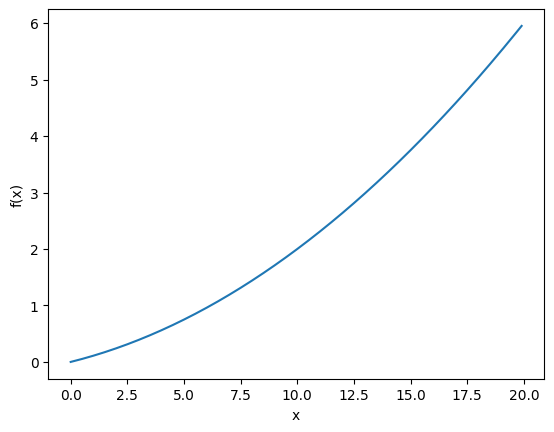

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [12]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


수치 미분 값을 기울기로 하는 직선

0.1999999999990898


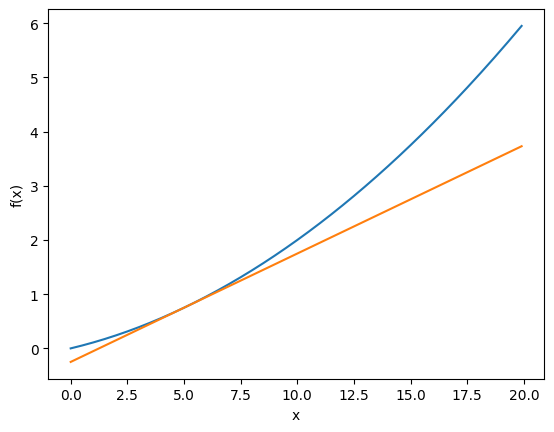

In [13]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 편미분
$$ f(x_0, x_1) = x_0 ^ 2 + x_1^2$$

In [14]:
def function_2(x):
  return x[0]**2 + x[1]**2

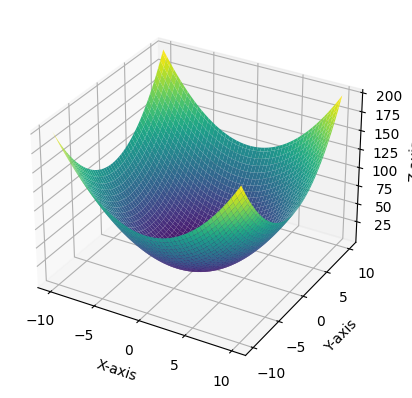

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function_2(x):
    x = np.array(x)  # 리스트를 넘파이 배열로 변환
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0)

# 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x, y 범위 설정
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x_range, y_range)

# z 값 계산
z = function_2([x, y])

# 그래프 그리기
ax.plot_surface(x, y, z, cmap='viridis')

# 라벨 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.show()


- 편미분: 변수가 여럿인 함수에 대한 미분

${x_0=3 x_1=4}$일 때${x_0}$에 대한 편미분

In [16]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

${x_0=3 x_1=4}$일 때${x_1}$에 대한 편미분

In [17]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4. 기울기
기울기: 모든 변수의 편미분을 벡터로 정리한 것

In [18]:
def numerical_gradient(f, x):
  h = 1e-4 #0.0001
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  return grad


print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


**기울기의 결과에 마이너스를 붙인 벡터 그리기**
- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

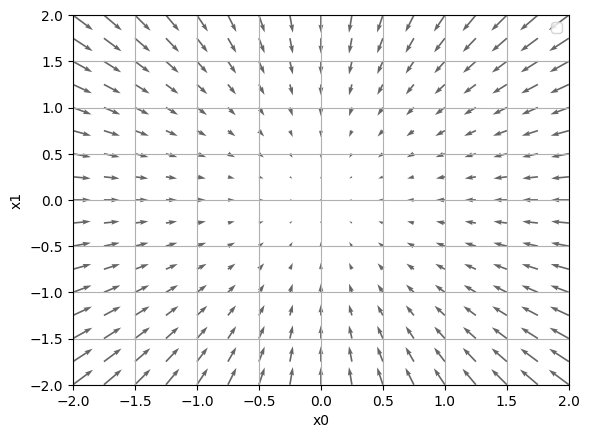

In [19]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 경사법(경사 하강법)
- 경사법: 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것
  - 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.
  - $\eta$는 갱신하는 양으로 학습량이라고 한다.
    - 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정한다.
    - 학습률 값은 0.01, 0.001 등 미리 특정 값으로 정해야 한다.
  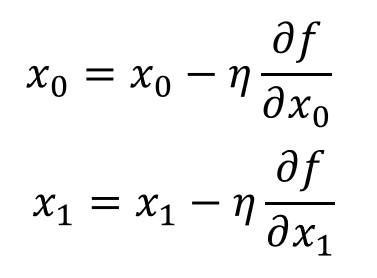

- 경사법 과정: 함수의 값을 점차 줄인다.
  - 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
  - 이동한 곳에서도 기울기를 구한다.
  - 또 그 기울어진 방향으로 나아간다.

**경사하강법 구현**

경사법으로 $ f(x_0, x_1) = x_0^2 + x_1^2 $ 의 최솟값 구하기

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
  return x

def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 0.1, step_num = 100))

[-6.11110793e-10  8.14814391e-10]


**경사법을 사용한 갱신 과정 그림 **

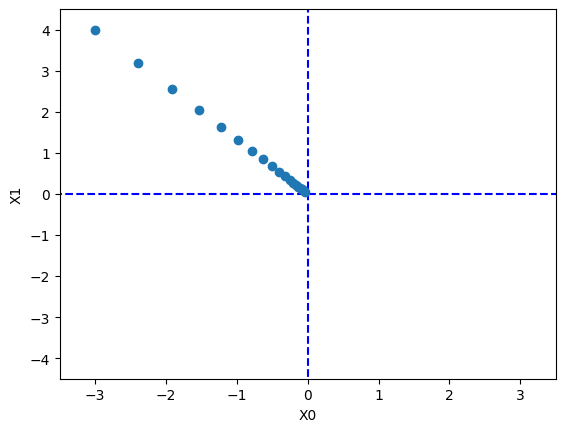

In [21]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [22]:
#학습률이 너무 큰 경우 : lr = 10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 10.0, step_num = 100))

#학습률이 너무 작은 경우: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 1e-10, step_num = 100))

(array([-2.58983747e+13, -1.29524862e+12]), array([[-3.00000000e+00,  4.00000000e+00],
       [ 5.70000000e+01, -7.60000000e+01],
       [-1.08300000e+03,  1.44400000e+03],
       [ 2.05770000e+04, -2.74360000e+04],
       [-3.90963008e+05,  5.21284002e+05],
       [ 7.42829664e+06, -9.90439654e+06],
       [-1.41137328e+08,  1.88183103e+08],
       [ 2.68126267e+09, -3.57501690e+09],
       [-5.09763373e+10,  6.79001831e+10],
       [ 9.45170863e+11, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2

### 신경망에서의 기울기
- 기울기: 가중치 매개변수에 대한 손실 함수의 기울기
- 경사는 $\frac{\partial L}{\partial W}$ 로 표현하고 각 원소는 각각의 원소에 관한 편미분이다.
- $\frac{\partial L}{\partial W_{11}}$는 ${w_{11}}$을 조금 변경했을 때 손실함수 L이 얼마나 변화하느냐를 나타낸다.
- 형상은 W와 같다.

**간단한 신경망으로 실제 기울기 구하는 코드 작성하기**


In [23]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss




In [24]:
net = simpleNet()
print(net.W)

[[ 1.15714972  1.52045576 -1.95519182]
 [-0.52514954 -0.78885263  0.19675009]]


In [25]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.22165524  0.20230609 -0.99604001]


In [26]:
np.argmax(p)

0

In [27]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.23657823  0.08623096 -0.32280919]
 [ 0.35486735  0.12934644 -0.48421378]]


### 학습 알고리즘 구현하기
- 확률적 경사하강법(SGD): 데이터를 미니배치로 무작위로 선정하여 수행한다.

In [41]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from functions import *
from gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
      W1, W2 = self.params['W1'], self.params['W2']
      b1, b2 = self.params['b1'], self.params['b2']
      grads = {}

      batch_num = x.shape[0]

      # forward
      a1 = np.dot(x, W1) + b1
      z1 = sigmoid(a1)
      a2 = np.dot(z1, W2) + b2
      y = softmax(a2)

      # backward
      dy = (y - t) / batch_num
      grads['W2'] = np.dot(z1.T, dy)
      grads['b2'] = np.sum(dy, axis=0)

      da1 = np.dot(dy, W2.T)
      dz1 = sigmoid_grad(a1) * da1
      grads['W1'] = np.dot(x.T, dz1)
      grads['b1'] = np.sum(dz1, axis=0)

      return grads



In [42]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [43]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
x = np.random.rand(100,784)
y = net.predict(x)
x = np.random.rand(100, 784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape

(784, 100)

**미니배치 학습 구현하기**
훈련 데이터 중 일부를 무작위로 꺼내고 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

In [44]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

iters_num = 10000 #반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]


  #기울기 계산
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)


  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  #1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.79495, 0.7999
train acc, test acc | 0.87825, 0.8817
train acc, test acc | 0.8987666666666667, 0.9044
train acc, test acc | 0.9078166666666667, 0.9109
train acc, test acc | 0.9148166666666666, 0.9188
train acc, test acc | 0.9193, 0.9243
train acc, test acc | 0.9240166666666667, 0.9262
train acc, test acc | 0.9272333333333334, 0.9283
train acc, test acc | 0.9304333333333333, 0.9315
train acc, test acc | 0.9335666666666667, 0.9349
train acc, test acc | 0.9366833333333333, 0.9379
train acc, test acc | 0.93905, 0.9395
train acc, test acc | 0.94135, 0.9407
train acc, test acc | 0.9431333333333334, 0.9413
train acc, test acc | 0.94445, 0.9435
train acc, test acc | 0.9473, 0.9449


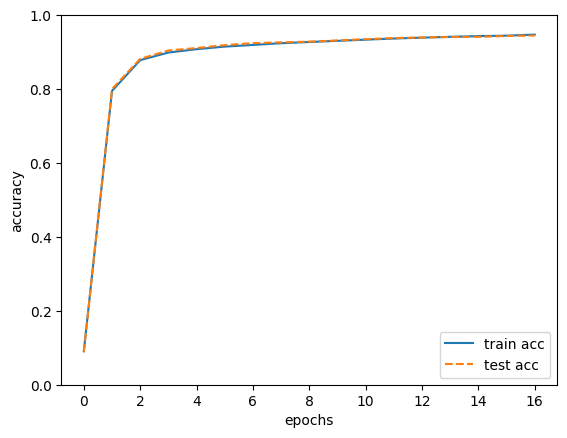

In [45]:
# 그림 4-12 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()